# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score, precision_score
from sklearn.manifold import TSNE

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# Read data

<p> DataSet : The dataset that is used for Credit Card Fraud Detection is derived from the following Kaggle URL :

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
dataset = pd.read_csv('creditcard.csv')
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Check data

In [3]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
dataset.shape

(284807, 31)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Check nulls

In [7]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Exploratory Data Analysis

Text(0.5,1,'Fraud vs Non-fraud cases Count')

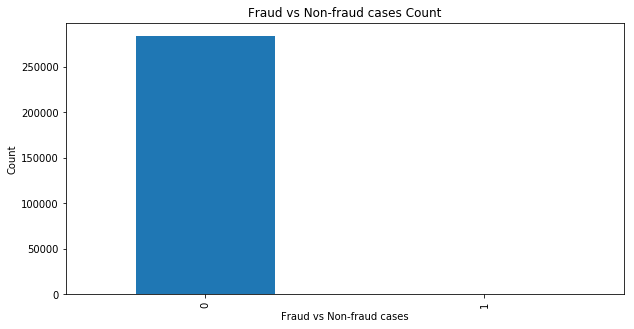

In [8]:
# Plot Fraud vs Non-fraud cases
plt.figure(figsize=(10,5))
ax = dataset.Class.value_counts().plot(kind = 'bar')
plt.xlabel("Fraud vs Non-fraud cases")
plt.ylabel("Count")
plt.title("Fraud vs Non-fraud cases Count")

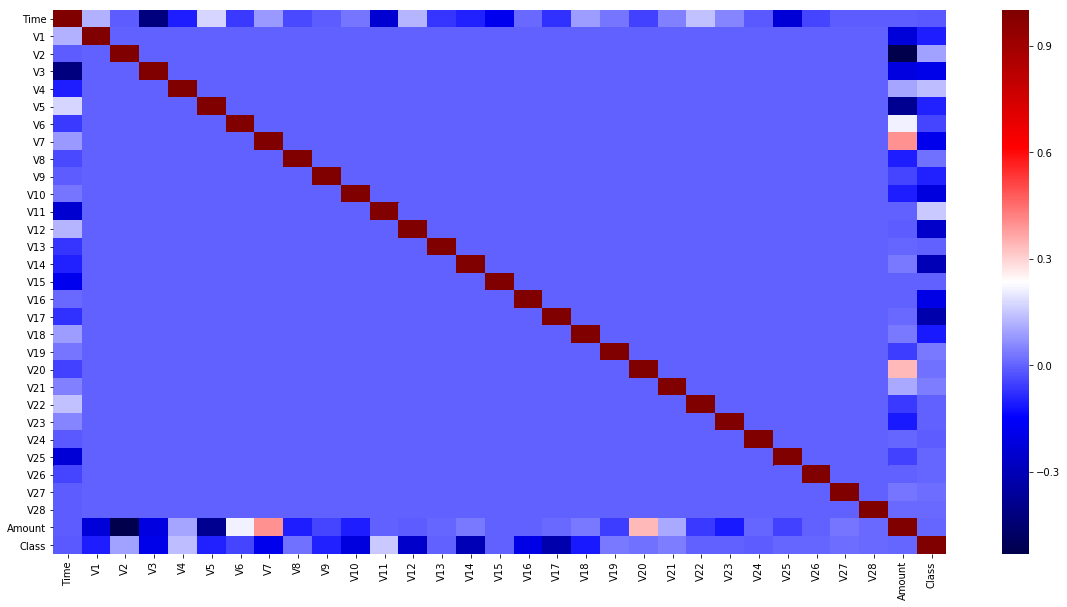

In [9]:
# Heatmap to find any high correlations
plt.figure(figsize=(20,10))
sns.heatmap(data=dataset.corr(), cmap="seismic")
plt.show()

<P> <b>Observations from Data- </b>
1. The data set is very imbalanced with only 492 Fraud records and 284315 Non-fraud records.
2. The dataset consists of numerical values from V1 to V28, which looks transformed from real data.
3. But 'Time' and 'Amount' features are not transformed. So we need scaling of dataset.
4. There is no missing value/NaNs in the dataset.

Using this data as it is with balancing it might overfit, but for comparison,we will first start with imbalanced data 
and see the results. Then we will balance the data and check the results again.

# Label Data

In [10]:
X = dataset.drop(["Class"], axis = 1)
y = dataset["Class"]

# Cluster data using Dimensionality reduction

<p> We will use <b>t-SNE algorithm</b>, which will accurately cluster the fraud vs non-fraud cases in the dataset.

In [11]:
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X.values)

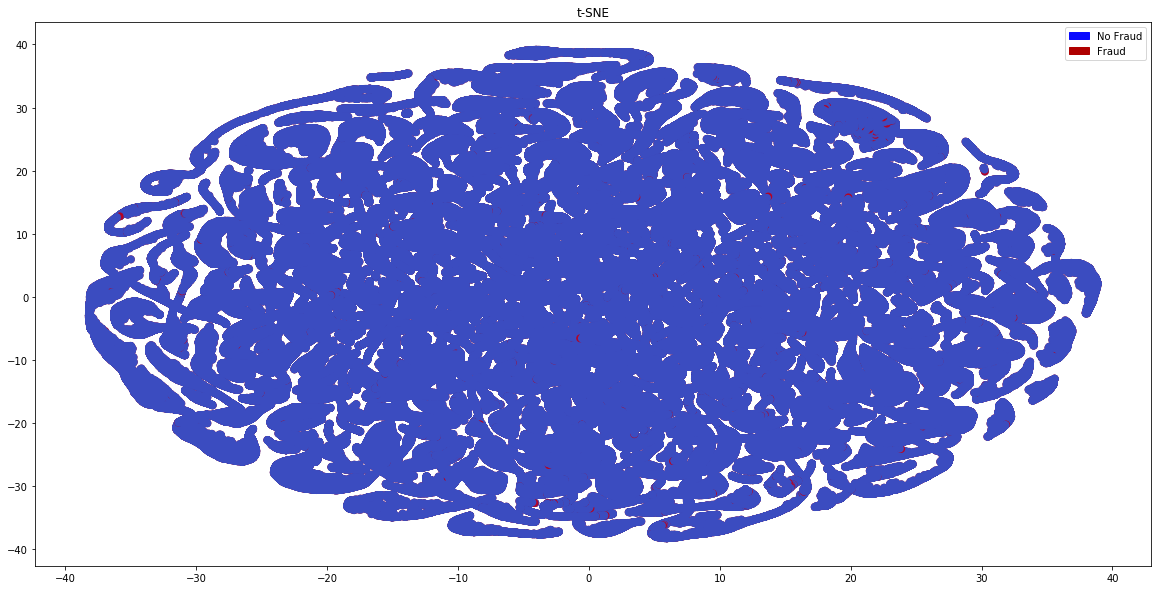

In [12]:
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')
plt.figure(figsize=(20,10))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
plt.title('t-SNE')
plt.legend(handles=[blue_patch, red_patch])

# Split into train and test sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
X_trainA = X_train.drop(["Time"], axis = 1)
X_testA = X_test.drop(["Time"], axis = 1)

## Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_trainA)
X_test = sc.transform(X_testA)

In [16]:
print(y_train[y_train.values == 0].shape[0])
print(y_train[y_train.values == 1].shape[0])
print(y_test[y_test.values == 0].shape[0])
print(y_test[y_test.values == 1].shape[0])

199019
345
85296
147


<p> It is very imbalanced data set, but first check how it is performing

# Create models on unbalanced data

In [17]:
def fit_and_predict(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)
    ypred = classifier.predict(X_testA)
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    print("Accuracy Score:", accuracy_score(y_test, ypred))
    print("Recall Score:", recall_score(y_test, ypred))
    print("Precision Score:", precision_score(y_test, ypred))
    
    test_df = pd.DataFrame(X_test, columns = X.columns[1:])
    test_df['Actual'] = y_test.values
    test_df['Predicted'] = ypred
    test_df.head()
    tp = test_df[(test_df['Actual'] == 1) & (test_df['Predicted'] == 1)].shape[0]
    actual_positive = test_df[(test_df['Actual'] == 1)].shape[0]
    print("True Positives: ", tp)
    print("Accuracy for fraud cases: ", (tp / actual_positive))
    print("ROC AUC Score: ", roc_auc_score(y_test, ypred))
    return roc_curve(y_test, ypred)

### Logistic regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_fp, lr_tp, lr_threshold = fit_and_predict(lr, X_trainA, y_train)
print("Threshold:", lr_threshold)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[85284    12]
 [   56    91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.999204147794436
Recall Score: 0.6190476190476191
Precision Score: 0.883495145631068
True Positives:  91
Accuracy for fraud cases:  0.6190476190476191
ROC AUC Score:  0.8094534662486266
Threshold: [2 1 0]


### Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree_fp, dtree_tp, dtree_threshold = fit_and_predict(dtree, X_trainA, y_train)
print("Threshold:", dtree_threshold)

[[85269    27]
 [   38   109]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.74      0.77       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9992392589211521
Recall Score: 0.7414965986394558
Precision Score: 0.8014705882352942
True Positives:  109
Accuracy for fraud cases:  0.7414965986394558
ROC AUC Score:  0.8705900269505665
Threshold: [2 1 0]


### Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf_fp, rf_tp, rf_threshold = fit_and_predict(rf, X_trainA, y_train)
print("Threshold:", rf_threshold)

[[85289     7]
 [   37   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.75      0.83       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9994850368081645
Recall Score: 0.7482993197278912
Precision Score: 0.9401709401709402
True Positives:  110
Accuracy for fraud cases:  0.7482993197278912
ROC AUC Score:  0.8741086262867555
Threshold: [2 1 0]


### Adaboost

In [21]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators = 100, random_state = 0)
adb_fp, adb_tp, adb_threshold = fit_and_predict(adb, X_trainA, y_train)
print("Threshold:", adb_threshold)

[[85279    17]
 [   46   101]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.69      0.76       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.93      0.84      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9992626663389628
Recall Score: 0.6870748299319728
Precision Score: 0.8559322033898306
True Positives:  101
Accuracy for fraud cases:  0.6870748299319728
ROC AUC Score:  0.8434377619928107
Threshold: [2 1 0]


### XGBoost

In [22]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 0)
xgb_fp, xgb_tp, xgb_threshold = fit_and_predict(xgb, X_trainA, y_train)
print("Threshold:", xgb_threshold)

[[85287     9]
 [   35   112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.76      0.84       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9994850368081645
Recall Score: 0.7619047619047619
Precision Score: 0.9256198347107438
True Positives:  112
Accuracy for fraud cases:  0.7619047619047619
ROC AUC Score:  0.8808996234959938
Threshold: [2 1 0]


## ROC Curve

Text(0.5,1,'ROC Curve')

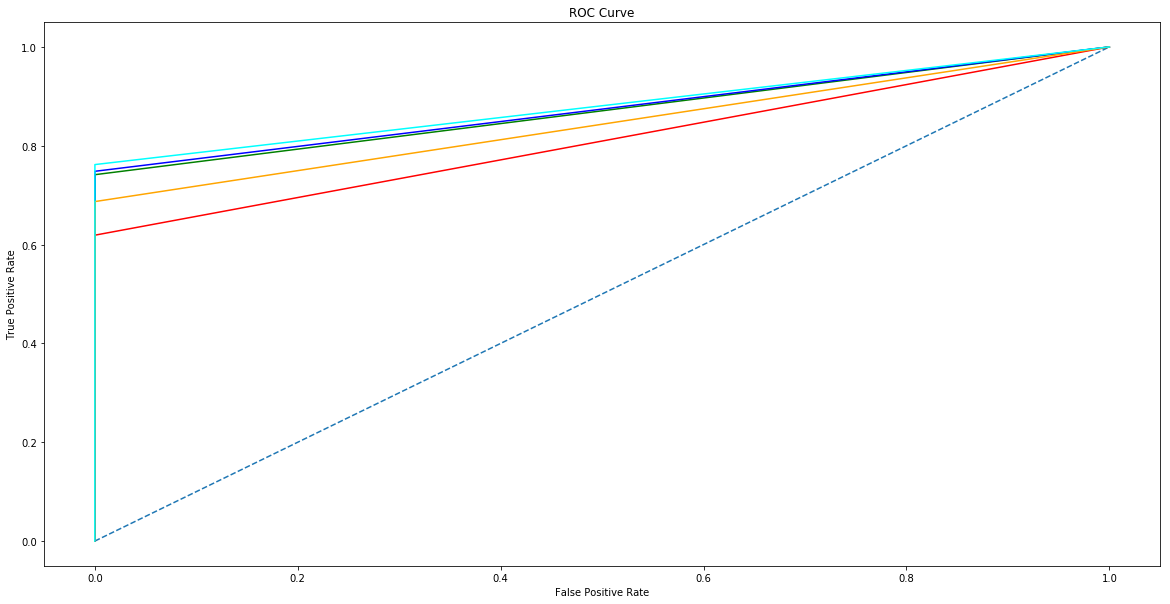

In [23]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dtree_fp, dtree_tp, color="green", label = "Decision Tree")
plt.plot(rf_fp, rf_tp, color="blue", label = "Random Forest")
plt.plot(adb_fp, adb_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

<p> With imbalanced dataset we are still getting satisfactory results.<br>
And it shows that the Decison Tree and Random Forest both are giving almost same results.<br>
But lets see how it reacts when we balance the dataset.
    </p>

# Balance Data using oversampling method

In [24]:
print(X_trainA.shape, y_train.shape)
print(X_testA.shape, y_test.shape)

(199364, 29) (199364,)
(85443, 29) (85443,)


In [25]:
X_train1 = X_trainA
X_train1['Class'] = y_train
X_train1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89,0
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98,0
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10,0
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96,0
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95,0


In [26]:
X_train_0_class, X_train_1_class = X_train1.Class.value_counts()
print(X_train_0_class, X_train_1_class)

199019 345


In [27]:
X_train1_0_df = X_train1[X_train1['Class']==0]
X_train1_1_df = X_train1[X_train1['Class']==1]
print(X_train1_0_df.shape, X_train1_1_df.shape)

(199019, 30) (345, 30)


In [28]:
# Balance Datasets
X_train1_1_df = X_train1_1_df.sample(X_train_0_class, replace=True, random_state=0)
print(X_train1_0_df.shape, X_train1_1_df.shape)

(199019, 30) (199019, 30)


In [29]:
X_train1 = pd.concat([X_train1_0_df, X_train1_1_df])
X_train1.shape

(398038, 30)

In [30]:
print(X_train1[X_train1['Class']==0].shape)
print(X_train1[X_train1['Class']==1].shape)

(199019, 30)
(199019, 30)


In [31]:
X_trainB = X_train1.drop("Class", axis =1)
y_trainB = X_train1["Class"]

In [32]:
print(X_trainB.shape, y_trainB.shape)
print(X_testA.shape, y_test.shape)

(398038, 29) (398038,)
(85443, 29) (85443,)


# Create models on Balanced Data

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_fp, lr_tp, lr_threshold = fit_and_predict(lr, X_trainB, y_trainB)
print("Threshold:", lr_threshold)

/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[83352  1944]
 [   13   134]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.91      0.12       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Accuracy Score: 0.977095841672226
Recall Score: 0.9115646258503401
Precision Score: 0.06448508180943215
True Positives:  134
Accuracy for fraud cases:  0.9115646258503401
ROC AUC Score:  0.9443867023455416
Threshold: [2 1 0]


### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree_fp, dtree_tp, dtree_threshold = fit_and_predict(dtree, X_trainB, y_trainB)
print("Threshold:", dtree_threshold)

[[85267    29]
 [   40   107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.79      0.73      0.76       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.89      0.86      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9991924440855307
Recall Score: 0.7278911564625851
Precision Score: 0.7867647058823529
True Positives:  107
Accuracy for fraud cases:  0.7278911564625851
ROC AUC Score:  0.8637755819829339
Threshold: [2 1 0]


### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf_fp, rf_tp, rf_threshold = fit_and_predict(rf, X_trainB, y_trainB)
print("Threshold:", rf_threshold)

[[85290     6]
 [   33   114]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.78      0.85       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9995435553526912
Recall Score: 0.7755102040816326
Precision Score: 0.95
True Positives:  114
Accuracy for fraud cases:  0.7755102040816326
ROC AUC Score:  0.8877199304032249
Threshold: [2 1 0]


### Adaboost

In [36]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators = 100, random_state = 0)
adb_fp, adb_tp, adb_threshold = fit_and_predict(adb, X_trainB, y_trainB)
print("Threshold:", adb_threshold)

[[84726   570]
 [   20   127]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     85296
           1       0.18      0.86      0.30       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.59      0.93      0.65     85443
weighted avg       1.00      0.99      1.00     85443

Accuracy Score: 0.9930948117458422
Recall Score: 0.8639455782312925
Precision Score: 0.18220946915351507
True Positives:  127
Accuracy for fraud cases:  0.8639455782312925
ROC AUC Score:  0.9286314835444588
Threshold: [2 1 0]


### XGBoost

In [37]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state = 0)
xgb_fp, xgb_tp, xgb_threshold = fit_and_predict(xgb, X_trainB, y_trainB)
print("Threshold:", xgb_threshold)

[[84950   346]
 [   19   128]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.27      0.87      0.41       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.63      0.93      0.71     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9957281462495465
Recall Score: 0.8707482993197279
Precision Score: 0.270042194092827
True Positives:  128
Accuracy for fraud cases:  0.8707482993197279
ROC AUC Score:  0.9333459185587573
Threshold: [2 1 0]


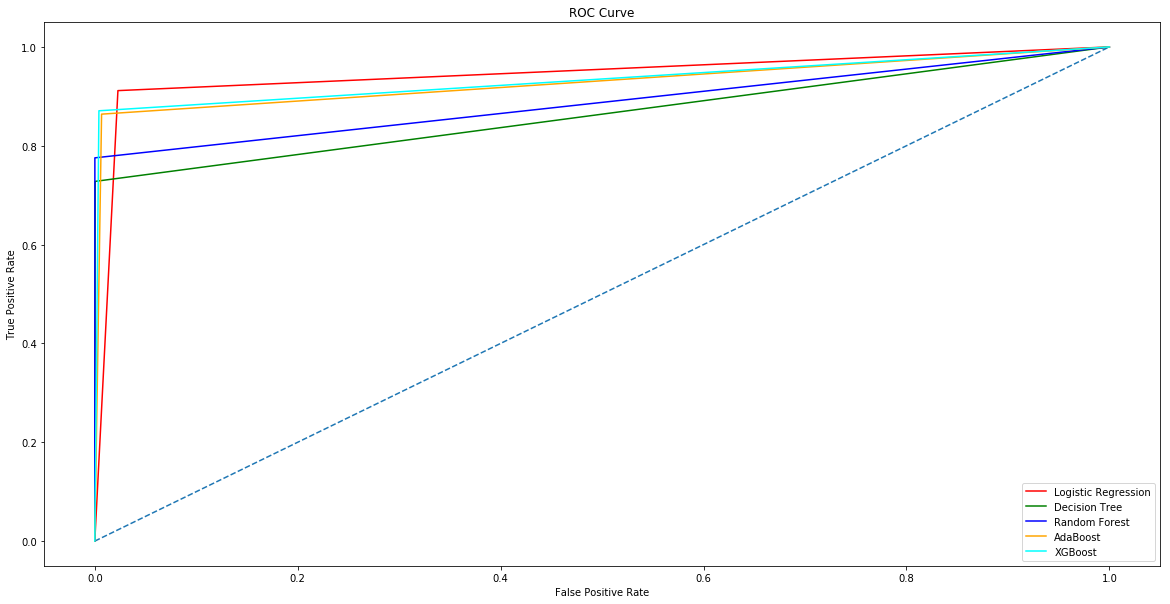

In [38]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dtree_fp, dtree_tp, color="green", label = "Decision Tree")
plt.plot(rf_fp, rf_tp, color="blue", label = "Random Forest")
plt.plot(adb_fp, adb_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

<p> With the balanced dataset Logistic Regression is giving very good results.<br>
And for Fraud Cases its giving 91% accuracy.<br>
Now lets check with Neural Networks.

# Using Neural Networks

In [39]:
import keras
from keras.layers import Dense
from keras.models import Sequential

/anaconda/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [40]:
classifier = Sequential()
classifier.add(Dense(units=16, activation="relu", input_dim=29))
classifier.add(Dense(units=2, activation="softmax"))
classifier.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 514
Trainable params: 514
Non-trainable params: 0
_________________________________________________________________


In [41]:
classifier.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [42]:
classifier.fit(X_trainB, y_trainB, batch_size=10, epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
398038/398038 [==============================] - 31s 79us/step - loss: 0.1225 - acc: 0.9702
Epoch 2/20
398038/398038 [==============================] - 32s 80us/step - loss: 0.0559 - acc: 0.9893
Epoch 3/20
398038/398038 [==============================] - 33s 83us/step - loss: 0.0371 - acc: 0.9926
Epoch 4/20
398038/398038 [==============================] - 32s 79us/step - loss: 0.0265 - acc: 0.9945
Epoch 5/20
398038/398038 [==============================] - 33s 83us/step - loss: 0.0206 - acc: 0.9955
Epoch 6/20
398038/398038 [==============================] - 31s 79us/step - loss: 0.0153 - acc: 0.9964
Epoch 7/20
398038/398038 [==============================] - 31s 78us/step - loss: 0.0137 - acc: 0.9970
Epoch 8/20
398038/398038 [==============================] - 31s 78us/step - loss: 0.0122 - acc: 0.9973
Epoch 9/20
398038/398038 [==============================] - 31s 78us/step - loss: 0.0114 - acc: 0.9976
Epoch 10/20
398038/398038

In [43]:
ypred_nn = classifier.predict_classes(X_testA)
print(confusion_matrix(y_test, ypred_nn))
print(classification_report(y_test, ypred_nn))
print("Accuracy Score:", accuracy_score(y_test, ypred_nn))

test_df = pd.DataFrame(X_test, columns = X.columns[1:])
test_df['Actual'] = y_test.values
test_df['Predicted'] = ypred_nn
test_df.head()
tp = test_df[(test_df['Actual'] == 1) & (test_df['Predicted'] == 1)].shape[0]
actual_positive = test_df[(test_df['Actual'] == 1)].shape[0]
print("True Positives: ", tp)
print("Accuracy for fraud cases: ", (tp / actual_positive))
print("ROC AUC Score: ", roc_auc_score(y_test, ypred_nn))
nn_fp, nn_tp, nn_threshold = roc_curve(y_test, ypred_nn)

[[85108   188]
 [   21   126]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.40      0.86      0.55       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.70      0.93      0.77     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score: 0.9975539248387814
True Positives:  126
Accuracy for fraud cases:  0.8571428571428571
ROC AUC Score:  0.9274693839268966


In [44]:
classifier.evaluate(X_testA, y_test)

85443/85443 [==============================] - 1s 11us/step


[0.014580491049781945, 0.9975539248387814]

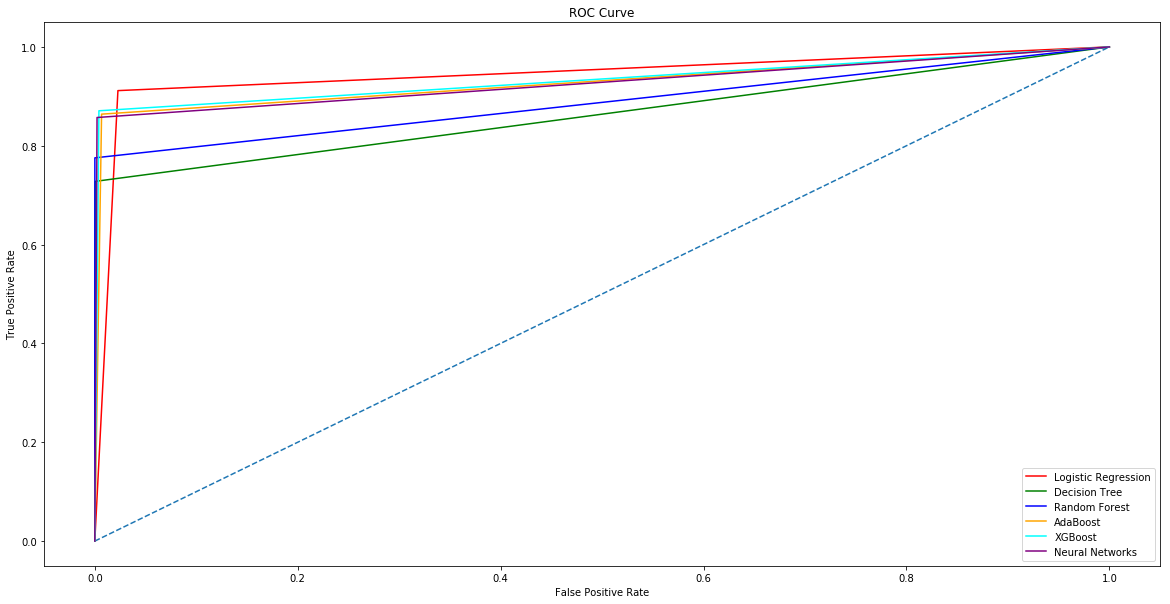

In [45]:
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0, 1], linestyle = "--")
plt.plot(lr_fp, lr_tp, color="red", label ="Logistic Regression")
plt.plot(dtree_fp, dtree_tp, color="green", label = "Decision Tree")
plt.plot(rf_fp, rf_tp, color="blue", label = "Random Forest")
plt.plot(adb_fp, adb_tp, color="orange", label = "AdaBoost")
plt.plot(xgb_fp, xgb_tp, color="cyan", label = "XGBoost")
plt.plot(nn_fp, nn_tp, color="purple", label = "Neural Networks")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

<p> With Neural Networks on balanced dataset, its giving 86% accuracy on Fraud Cases.<br>
But still for Fraud cases the winner is Logistic Regression with 91% accuracy on Fraud Cases. But logistic regression is giving more False Positives.
Both Boosting models - Adaboost and XGBoost are next considerations but compare to Neural Networks they still have more False Positives. So its a choice between XGboost and Neural Networks. I am considering XGBoost for its better performance in terms of training and we can play with attributes too for improving precision.

# Get most important features and their contribution in model

In [46]:
feature_importance_df = pd.DataFrame(X_trainB.columns, columns=["Feature"])
feature_importance_df["Importance"] = rf.feature_importances_
feature_importance_df.sort_values('Importance', ascending=False, inplace=True)
feature_importance_df = feature_importance_df.head(20)
feature_importance_df

,Feature,Importance
13,V14,0.207603
11,V12,0.148993
3,V4,0.106567
9,V10,0.089997
10,V11,0.069148
2,V3,0.063342
16,V17,0.054998
6,V7,0.034956
15,V16,0.033992
1,V2,0.019615


Text(0.5,1,'Plot Feature Importances')

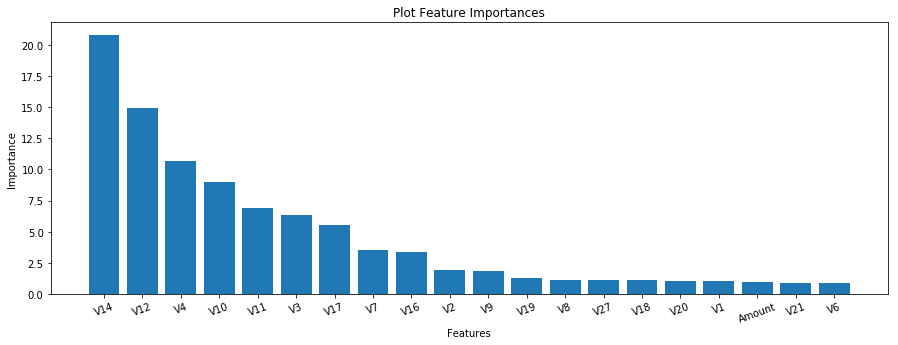

In [47]:
plt.figure(figsize=(15,5))
ax = feature_importance_df['Feature']
plt.bar(range(feature_importance_df.shape[0]), feature_importance_df['Importance']*100)
plt.xticks(range(feature_importance_df.shape[0]), feature_importance_df['Feature'], rotation = 20)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Plot Feature Importances")

# Conclusion

<p> After investigating and visualizing through the data, we found that the data is unbalanced. So we balanced the data.
After balancing training data, we trainied it and these were the results-<br>
<b>Logistic Regression</b> is giving 98% accuracy, 91 % recall and 6% precision. Accuracy for fraud cases is 91% and ROC AUC Score is 94%<br>
<b>Decision Tree</b> is giving 99% accuracy, 70 % recall and 77% precision. Accuracy for fraud cases is 70% and ROC AUC Score is 85%<br>
<b>Random Forest</b> is giving 99% accuracy, 77 % recall and 95% precision. Accuracy for fraud cases is 76% and ROC AUC Score is 88%<br>
<b>AdaBoost</b> is giving 99% accuracy, 86 % recall and 18% precision. Accuracy for fraud cases is 86% and ROC AUC Score is 93%<br>
<b>XGBoost</b> is giving 99% accuracy, 87 % recall and 27% precision. Accuracy for fraud cases is 87% and ROC AUC Score is 93%<br>
<b>Neural Networks</b> is giving 99% accuracy, 86 % recall and 25% precision. Accuracy for fraud cases is 86% and ROC AUC Score is 93%<br>
